# Importing the Necessary Python Library for the model development

In [ ]:
#Standard Library Imports
import os
import glob
import time

#Data Handling & Manipulation
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing & Resampling
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Model Training & Splitting
from sklearn.model_selection import train_test_split

#Google Colab Integration
from google.colab import drive

#Load the Dataset

In [ ]:
#Mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining dataset paths
WSN_DS_path = r'/content/drive/MyDrive/WSN_DS'

In [ ]:
# Debugging: Check paths existence
print("\nVerifying paths...")
if not os.path.exists(WSN_DS_path):
    print(f"Error: WSN_DS_path directory not found at: {WSN_DS_path}")
else:
    print(f"WSN_DS_path directory found: {WSN_DS_path}")


Verifying paths...
WSN_DS_path directory found: /content/drive/MyDrive/WSN_DS


In [ ]:
# Find all CSV files in the WSN_DS_path directory
csv_files = glob.glob(os.path.join(WSN_DS_path, '*.csv'))

#Data Exploration and pre-processing

In [ ]:
# Check if any CSV files were found, read the csv files found and explore the econtent of the csv files found
if not csv_files:
    print(f"Error: No CSV files found in {WSN_DS_path}")
else:
    file = csv_files[0]
    print(f"Reading file: {os.path.basename(file)}")
    try:
        df = pd.read_csv(file, low_memory=False)
        display(df.head())
        display(df.describe())
        df.info()
    except Exception as e:
        print(f"Error reading {file}: {e}")

Reading file: WSN-DS.csv


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [ ]:
#check for missing value for each column in the (Dataframe)df
df.isnull().sum()

,0
id,0
Time,0
Is_CH,0
who CH,0
Dist_To_CH,0
ADV_S,0
ADV_R,0
JOIN_S,0
JOIN_R,0
SCH_S,0


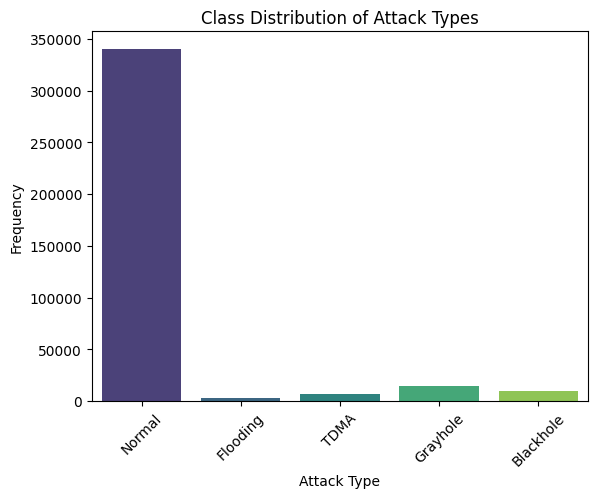

In [ ]:
# Checking class distribution of the 'Attack type' column

# Use seaborn to create a more colorful bar plot
sns.countplot(x='Attack type', data=df, palette='viridis', hue='Attack type', legend=False)

plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Checking class distribution of the 'Attack type' column
attack_type_counts = df['Attack type'].value_counts()
print(attack_type_counts)

Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64


In [ ]:
#Make copy of the data frame and remove the attack type column
df_copy = df.drop(["Attack type"], axis = 1)
df_copy.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534


In [ ]:
#calculates the correlation matrix for the copied data frame and store in variable corr
corr = df_copy.corr()
corr

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy
id,1.000000,0.674170,0.179659,1.000000,-0.329638,0.042635,-0.039515,-0.561031,-0.046773,-0.023138,-0.510604,-0.239057,-0.183151,0.057861,0.088892,0.485083,-0.291817,0.001999
Time,0.674170,1.000000,0.282040,0.674184,-0.352468,0.012819,0.061591,-0.502793,-0.039882,0.000210,-0.439315,-0.316458,-0.042900,0.081480,0.061050,0.352591,-0.242577,0.028775
Is_CH,0.179659,0.282040,1.000000,0.179665,-0.372439,0.358947,0.399472,-0.681119,0.434253,0.289925,-0.601437,-0.238737,-0.381239,0.288215,0.365186,0.310198,-0.375453,0.236316
who CH,1.000000,0.674184,0.179665,1.000000,-0.329650,0.042634,-0.039512,-0.561048,-0.046774,-0.023138,-0.510622,-0.239066,-0.183153,0.057876,0.088896,0.485098,-0.291824,0.002007
Dist_To_CH,-0.329638,-0.352468,-0.372439,-0.329650,1.000000,-0.133686,-0.009616,0.546805,-0.161619,-0.107979,0.458355,0.382459,-0.006305,-0.315255,-0.217098,-0.420626,0.198440,-0.182533
ADV_S,0.042635,0.012819,0.358947,0.042634,-0.133686,1.000000,0.239682,-0.244485,0.086911,0.040939,-0.188804,-0.085694,-0.136844,0.058440,0.149805,0.200963,-0.134768,0.119152
ADV_R,-0.039515,0.061591,0.399472,-0.039512,-0.009616,0.239682,1.000000,-0.099586,-0.059558,-0.038879,-0.223524,-0.020825,-0.064312,-0.126620,-0.030728,-0.077467,0.143532,0.074849
JOIN_S,-0.561031,-0.502793,-0.681119,-0.561048,0.546805,-0.244485,-0.099586,1.000000,-0.295760,-0.197473,0.897659,0.313790,0.486601,-0.585557,-0.381757,-0.761552,0.551230,-0.324784
JOIN_R,-0.046773,-0.039882,0.434253,-0.046774,-0.161619,0.086911,-0.059558,-0.295760,1.000000,0.611823,-0.270283,-0.103712,-0.165314,0.450515,0.165065,0.131150,-0.162926,0.213972
SCH_S,-0.023138,0.000210,0.289925,-0.023138,-0.107979,0.040939,-0.038879,-0.197473,0.611823,1.000000,-0.180473,-0.069216,-0.110531,0.029406,0.053736,0.005122,-0.108853,0.032082


<Axes: >

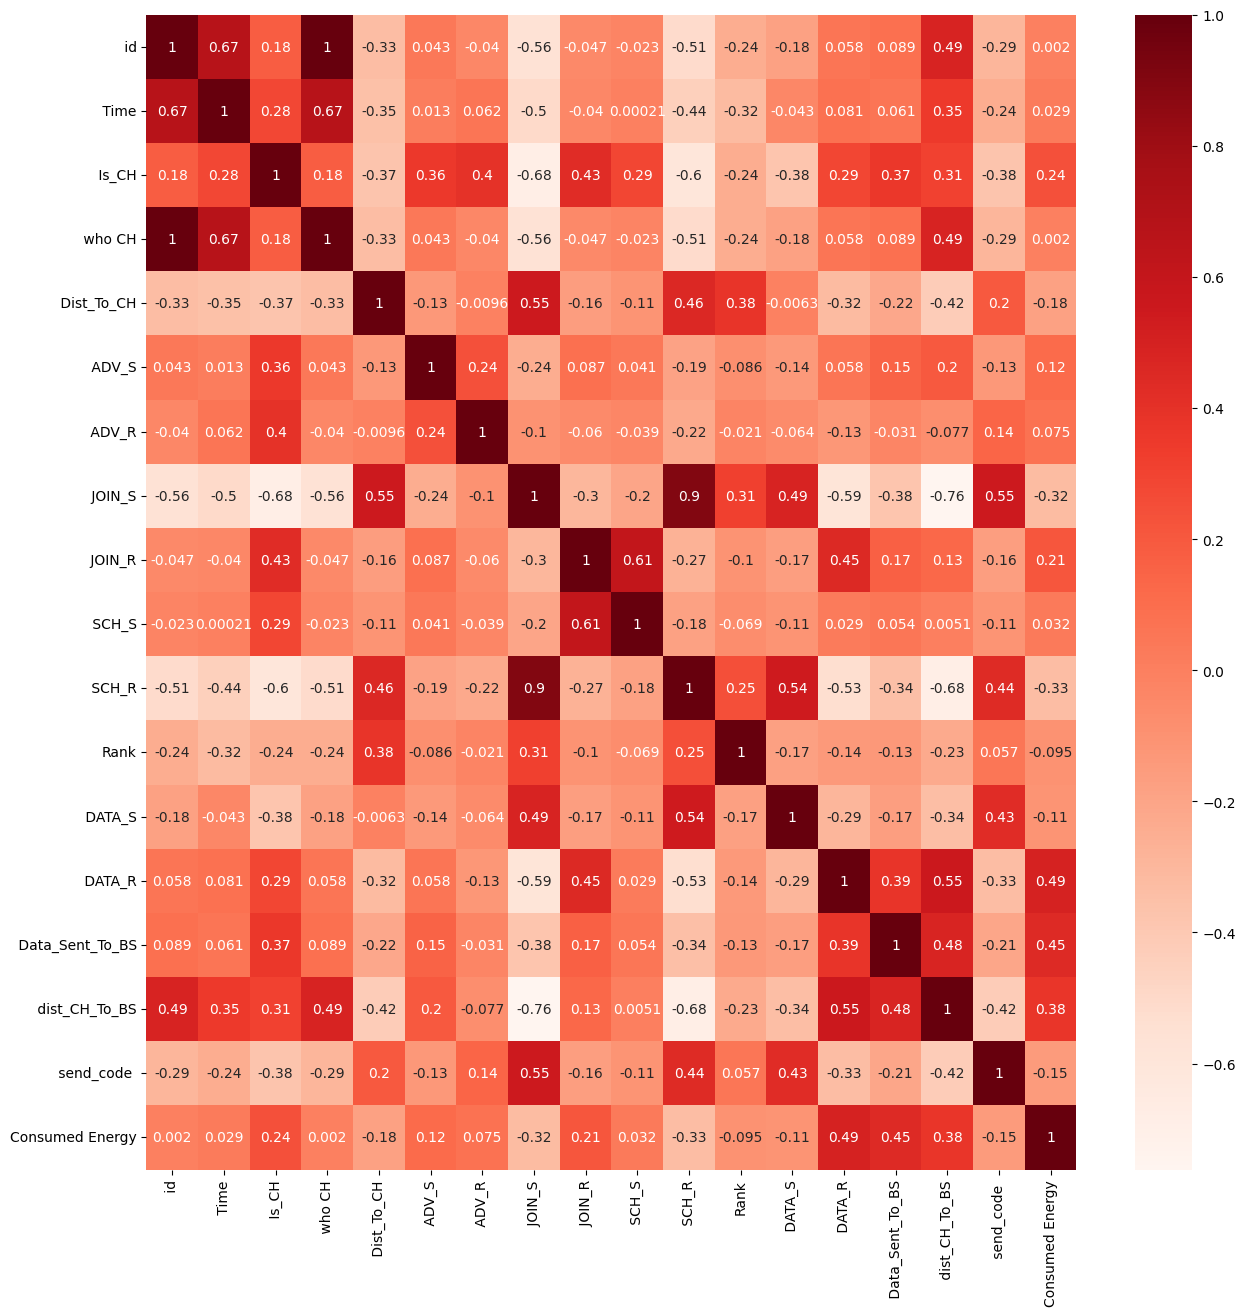

In [ ]:
#visualise the heatmap correlation matrix
plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap='Reds', annot=True)

In [ ]:
# remove who CH feature and split data to x and y:

df.columns = df.columns.str.strip() # the column name of who CH has extra spaces, remove them

columsToDrop = ['Attack type', 'who CH']
x = df.drop(columns=columsToDrop)
y = df["Attack type"]

In [ ]:
# Separating features and target
X = df.drop('Attack type', axis=1)
y = df['Attack type']

#Apply feature selection with mutual information

Mutual Information Scores:
ADV_S              0.271297
Consumed Energy    0.243621
Is_CH              0.242369
JOIN_S             0.232195
SCH_R              0.205072
DATA_S             0.193303
Rank               0.165125
send_code          0.160087
Dist_To_CH         0.152205
ADV_R              0.132023
SCH_S              0.106445
who CH             0.099538
Data_Sent_To_BS    0.090750
id                 0.087298
JOIN_R             0.081009
dist_CH_To_BS      0.059528
Time               0.059504
DATA_R             0.041222
dtype: float64


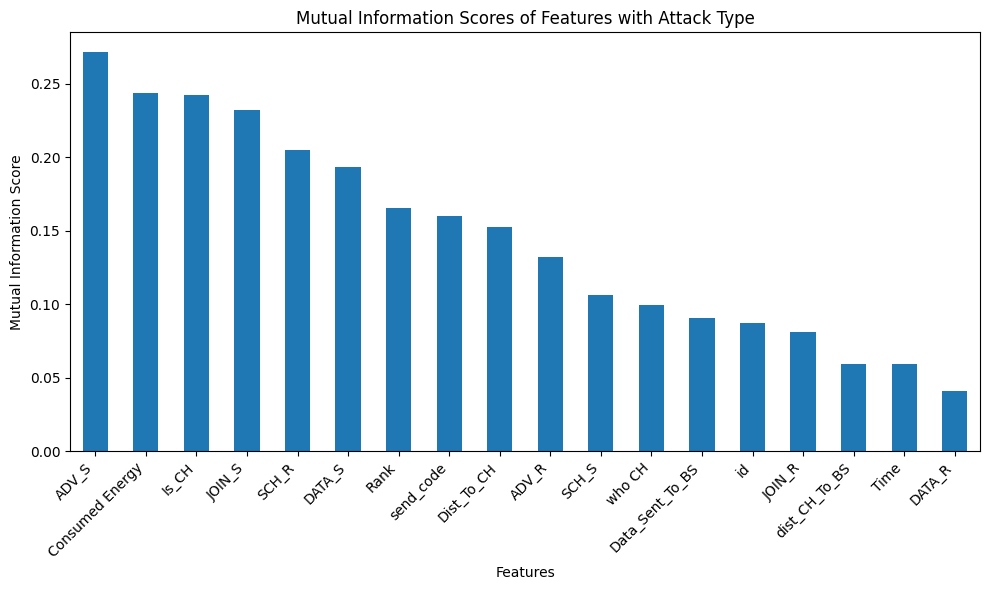

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information between features and the target variable
# Make sure to use the original X and y before resampling for feature selection
mutual_info = mutual_info_classif(X, y, random_state=42)

# Create a pandas Series for better visualization of mutual information scores
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Sort the features by mutual information score in descending order
mutual_info_series.sort_values(ascending=False, inplace=True)

print("Mutual Information Scores:")
print(mutual_info_series)

# Visualize the mutual information scores
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title('Mutual Information Scores of Features with Attack Type')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# We can then select a subset of features based on these scores, e.g., the top N features or features above a certain threshold.
# Example: Selecting the top 10 features
# X_filtered = X[mutual_info_series.nlargest(10).index]
# print("\nShape of features dataframe after filter method selection:", X_filtered.shape)

In [ ]:
# Select the top 13 features based on mutual information scores
n_top_features = 13

# Get the names of the top features from the previously calculated mutual_info_series
top_features = mutual_info_series.nlargest(n_top_features).index.tolist()

# Update the feature set X to include only the selected top features
# Ensure X is the dataframe before resampling
X = df.drop('Attack type', axis=1).copy() # Start with the original features before any modifications
X = X[top_features]


print(f"\nSelected Top {n_top_features} Features:")
print(top_features)
print(f"\nShape of features dataframe after selecting top features: {X.shape}")


Selected Top 13 Features:
['ADV_S', 'Consumed Energy', 'Is_CH', 'JOIN_S', 'SCH_R', 'DATA_S', 'Rank', 'send_code', 'Dist_To_CH', 'ADV_R', 'SCH_S', 'who CH', 'Data_Sent_To_BS']

Shape of features dataframe after selecting top features: (374661, 13)


In [ ]:
# Display the head of the selected features
print("Head of the selected features:")
display(X.head())

# Print the shape of the selected features
print("\nShape of the selected features:", X.shape)

Head of the selected features:


,ADV_S,Consumed Energy,Is_CH,JOIN_S,SCH_R,DATA_S,Rank,send_code,Dist_To_CH,ADV_R,SCH_S,who CH,Data_Sent_To_BS
0,1,2.46940,1,0,0,0,0,0,0.00000,0,1,101000,48
1,0,0.06957,0,1,1,38,2,4,75.32345,4,0,101044,0
2,0,0.06898,0,1,1,41,19,3,46.95453,4,0,101010,0
3,0,0.06673,0,1,1,38,16,4,64.85231,4,0,101044,0
4,0,0.06534,0,1,1,41,25,3,4.83341,4,0,101010,0



Shape of the selected features: (374661, 13)


#Handling Class Imbalance

In [ ]:
# Applying ADASYN (Adaptive Synthetic Sampling) to balance the dataset because some attack type have very small records

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Checking the new class distribution after resampling
print(y_resampled.value_counts())

Attack type
Flooding     340209
Normal       340066
Blackhole    339917
TDMA         339745
Grayhole     339048
Name: count, dtype: int64


In [ ]:
# Applying SMOTE-Tomek to balance the dataset
#from imblearn.combine import SMOTETomek

#smote_tomek = SMOTETomek(random_state=42)
#X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Checking the new class distribution after resampling
#print(y_resampled.value_counts())

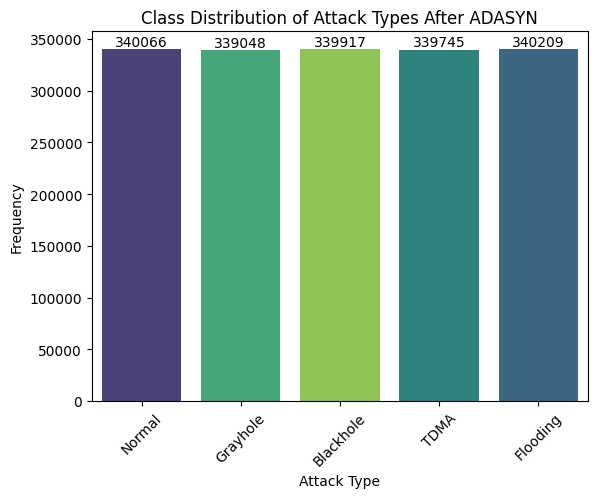

In [ ]:
# Define the desired order of attack types
order = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

# Plotting the class distribution after ADASYN with specified order
# Use seaborn to create a more colorful bar plot
ax = sns.countplot(x=y_resampled, order=order, palette='viridis', hue=y_resampled, legend=False)

# Add the count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.title('Class Distribution of Attack Types After ADASYN')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Now we proceed with the scaling and train-test split

In [ ]:
# Define feature set (X) and target (y) using the resampled data
X = X_resampled
y = y_resampled

In [ ]:
#Split the balanced data into training and testing sets using train_test_split.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Train-Test Split (70-30 split)

In [ ]:
#Feature Scaling using StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Train XGBoost model

In [ ]:
# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42)

In [ ]:
# Train XGBoost
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
print("Training XGBoost...")

# Encode the target variable
label_encoder_xgb = LabelEncoder()
y_train_encoded_xgb = label_encoder_xgb.fit_transform(y_train)
y_test_encoded_xgb = label_encoder_xgb.transform(y_test)

xgb.fit(X_train_scaled, y_train_encoded_xgb) # Use the encoded training labels

Training XGBoost...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#  Make predictions on the test set with XGBoost
print("Making predictions with XGBoost...")
start_time_pred_xgb = time.time()
y_pred_xgb = xgb.predict(X_test_scaled)
end_time_pred_xgb = time.time()
prediction_time_xgb = end_time_pred_xgb - start_time_pred_xgb
print(f"XGBoost Prediction Time: {prediction_time_xgb:.4f} seconds")

Making predictions with XGBoost...
XGBoost Prediction Time: 3.4158 seconds


Accuracy: 0.9814713083877449
XGBoost Prediction Time: 3.4158072471618652

Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.98      0.98      0.98    101802
    Flooding       1.00      1.00      1.00    102514
    Grayhole       0.97      0.98      0.97    101686
      Normal       0.98      0.98      0.98    101644
        TDMA       0.98      0.97      0.98    102050

    accuracy                           0.98    509696
   macro avg       0.98      0.98      0.98    509696
weighted avg       0.98      0.98      0.98    509696



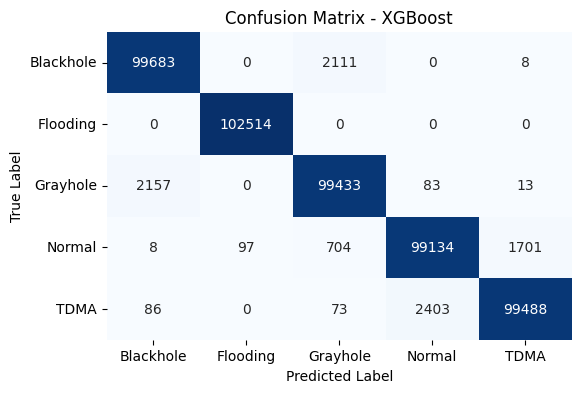

In [ ]:
# Evaluate the XGBoost model's performance

# Decode the predicted labels back to original class names for the classification report and confusion matrix
y_pred_xgb_decoded = label_encoder_xgb.inverse_transform(y_pred_xgb)

print("Accuracy:", accuracy_score(y_test_encoded_xgb, y_pred_xgb))
print("XGBoost Prediction Time:", prediction_time_xgb)
print("\nClassification Report:\n", classification_report(y_test_encoded_xgb, y_pred_xgb, target_names=label_encoder_xgb.classes_))


# Visualize the confusion matrix
cm_xgb = confusion_matrix(y_test_encoded_xgb, y_pred_xgb)
# Use the classes from the label encoder for the confusion matrix labels
classes_xgb = label_encoder_xgb.classes_
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes_xgb, yticklabels=classes_xgb)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Train Decision Tree (DT) Model

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train DT
print("Training Decision Tree...")
dt_model.fit(X_train_scaled, y_train)

Training Decision Tree...


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set and measure detection time
print("Making predictions with Decision Tree...")
start_time_pred_dt = time.time()
y_pred_dt = dt_model.predict(X_test_scaled)
end_time_pred_dt = time.time()
prediction_time_dt = end_time_pred_dt - start_time_pred_dt
print(f"Decision Tree Prediction Time: {prediction_time_dt:.4f} seconds")

Making predictions with Decision Tree...
Decision Tree Prediction Time: 0.0948 seconds



Decision Tree Accuracy on Test Set: 0.9918

Decision Tree Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.99      0.99      0.99    101802
    Flooding       1.00      1.00      1.00    102514
    Grayhole       0.98      0.99      0.99    101686
      Normal       0.99      0.99      0.99    101644
        TDMA       0.99      1.00      0.99    102050

    accuracy                           0.99    509696
   macro avg       0.99      0.99      0.99    509696
weighted avg       0.99      0.99      0.99    509696



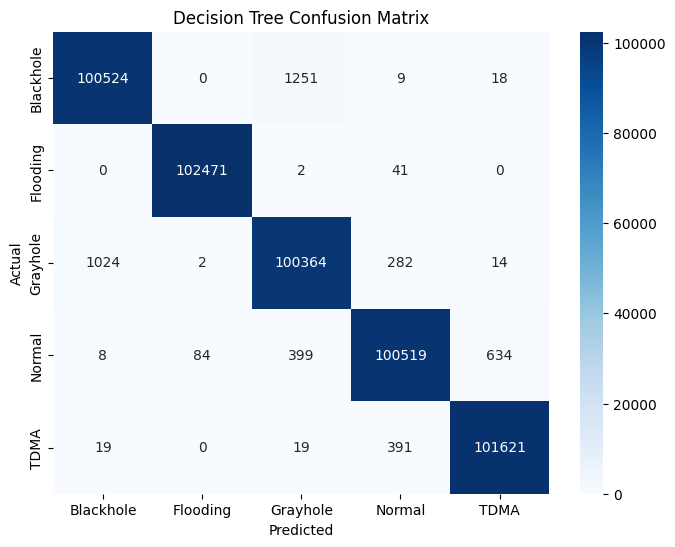

In [ ]:
# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy on Test Set: {accuracy_dt:.4f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Visualize the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train an Artificial Neural Network (ANN) model

In [ ]:
# Train an Artificial Neural Network (ANN) model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Encode the target variable for ANN (ANNs typically require numerical labels)
label_encoder_ann = LabelEncoder()
y_train_encoded_ann = label_encoder_ann.fit_transform(y_train)
y_test_encoded_ann = label_encoder_ann.transform(y_test)

# Define the ANN model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Input layer
    Dense(64, activation='relu'), # Hidden layer
    Dense(len(np.unique(y_train_encoded_ann)), activation='softmax') # Output layer (number of classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
print("Training Artificial Neural Network (ANN)...")
# We used 20% of the orginal training set for validation
history = model.fit(X_train_scaled, y_train_encoded_ann, epochs=10, batch_size=32, validation_split=0.2, verbose=1) # Added verbose=0 to reduce output

Training Artificial Neural Network (ANN)...
Epoch 1/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8577 - loss: 0.2878 - val_accuracy: 0.9023 - val_loss: 0.2240
Epoch 2/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9044 - loss: 0.2042 - val_accuracy: 0.9208 - val_loss: 0.1733
Epoch 3/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9229 - loss: 0.1737 - val_accuracy: 0.9279 - val_loss: 0.1627
Epoch 4/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - accuracy: 0.9277 - loss: 0.1638 - val_accuracy: 0.9295 - val_loss: 0.1580
Epoch 5/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - accuracy: 0.9309 - loss: 0.1583 - val_accuracy: 0.9299 - val_loss: 0.1580
Epoch 6/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9331 - loss: 0.1534 - val_accuracy: 0.9353 - val_loss: 0.1462
Epoch 7/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - accuracy: 0.9346 - loss: 0.1504 - val_accuracy: 0.9382 - val_loss: 0.1432
Epoch 8/10
29733/29733 ━━

In [ ]:
# Make predictions on the test set
print("Making predictions with ANN...")
start_time_pred_ann = time.time()
y_pred_ann_probs = model.predict(X_test_scaled)
y_pred_ann = np.argmax(y_pred_ann_probs, axis=1) # Get the predicted class index
end_time_pred_ann = time.time()
prediction_time_ann = end_time_pred_ann - start_time_pred_ann
print(f"ANN Prediction Time: {prediction_time_ann:.4f} seconds")

Making predictions with ANN...
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 13s 820us/step
ANN Prediction Time: 18.5292 seconds



ANN Accuracy on Test Set: 0.9362

ANN Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.89      0.97      0.93    101802
    Flooding       1.00      1.00      1.00    102514
    Grayhole       0.95      0.88      0.92    101686
      Normal       0.91      0.93      0.92    101644
        TDMA       0.93      0.91      0.92    102050

    accuracy                           0.94    509696
   macro avg       0.94      0.94      0.94    509696
weighted avg       0.94      0.94      0.94    509696



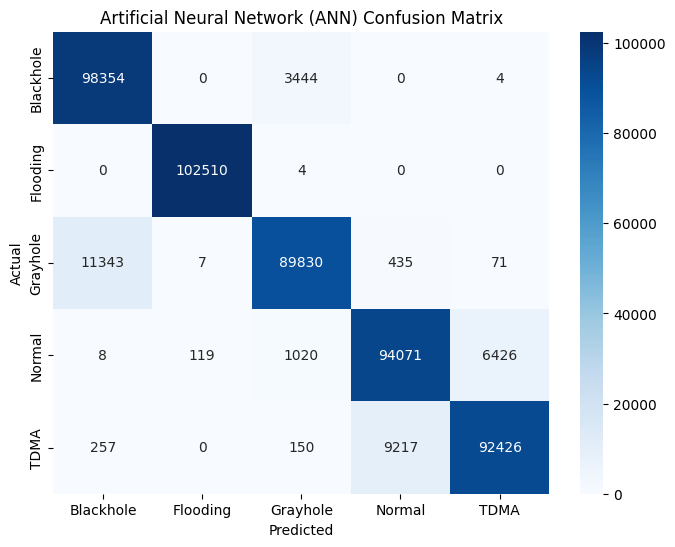

In [ ]:
# Evaluate the model's performance
accuracy_ann = accuracy_score(y_test_encoded_ann, y_pred_ann)
print(f"\nANN Accuracy on Test Set: {accuracy_ann:.4f}")
print("\nANN Classification Report:\n", classification_report(y_test_encoded_ann, y_pred_ann, target_names=label_encoder_ann.classes_)) # Use target_names for readable report

# Visualize the confusion matrix
conf_matrix_ann = confusion_matrix(y_test_encoded_ann, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_ann.classes_, yticklabels=label_encoder_ann.classes_)
plt.title('Artificial Neural Network (ANN) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train a Convolutional Neural Network (CNN)

In [ ]:
# Train a Convolutional Neural Network (CNN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Assuming X_resampled and y_resampled are available from the ADASYN resampling step
# X_resampled contains the selected features after resampling
# y_resampled contains the corresponding resampled target labels

# Split the resampled data into training and testing sets (e.g., 80-20 split for CNN)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled # Stratify to maintain class distribution
)

# Standardize the features using StandardScaler
scaler_cnn = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled_cnn = scaler_cnn.fit_transform(X_train_cnn)
X_test_scaled_cnn = scaler_cnn.transform(X_test_cnn)

# Encode the target variable for CNN (ANNs typically require numerical labels)
label_encoder_cnn = LabelEncoder()
y_train_encoded_cnn = label_encoder_cnn.fit_transform(y_train_cnn)
y_test_encoded_cnn = label_encoder_cnn.transform(y_test_cnn)

# Reshape the input data for CNN.
# CNN expects input in the format (samples, time steps, features).
# Here, we treat each feature as a time step of length 1.
X_train_cnn_reshaped = X_train_scaled_cnn.reshape((X_train_scaled_cnn.shape[0], X_train_scaled_cnn.shape[1], 1))
X_test_cnn_reshaped = X_test_scaled_cnn.reshape((X_test_scaled_cnn.shape[0], X_test_scaled_cnn.shape[1], 1))

print(f"Shape of training data after reshaping for CNN: {X_train_cnn_reshaped.shape}")
print(f"Shape of testing data after reshaping for CNN: {X_test_cnn_reshaped.shape}")

Shape of training data after reshaping for CNN: (1359188, 13, 1)
Shape of testing data after reshaping for CNN: (339797, 13, 1)


In [ ]:
# Define the CNN model architecture
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train_encoded_cnn)), activation='softmax') # Output layer (number of classes)
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

print("CNN model architecture defined and compiled.")
model_cnn.summary()

CNN model architecture defined and compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 11, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,989 (164.02 KB)

 Trainable params: 41,989 (164.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
print("Training Convolutional Neural Network (CNN)...")
start_time_cnn = time.time()
# We used 20% of the orginal training set for validation
history_cnn = model_cnn.fit(X_train_cnn_reshaped, y_train_encoded_cnn, epochs=10, batch_size=32, validation_split=0.2, verbose=1) # Changed verbose to 1
end_time_cnn = time.time()
training_time_cnn = end_time_cnn - start_time_cnn
print(f"CNN Training Time: {training_time_cnn:.4f} seconds")

Training Convolutional Neural Network (CNN)...
Epoch 1/10
33980/33980 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.8348 - loss: 0.3520 - val_accuracy: 0.8866 - val_loss: 0.2560
Epoch 2/10
33980/33980 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.8977 - loss: 0.2417 - val_accuracy: 0.9039 - val_loss: 0.2261
Epoch 3/10
33980/33980 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9037 - loss: 0.2271 - val_accuracy: 0.9046 - val_loss: 0.2193
Epoch 4/10
33980/33980 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9063 - loss: 0.2212 - val_accuracy: 0.9071 - val_loss: 0.2119
Epoch 5/10
33980/33980 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9081 - loss: 0.2171 - val_accuracy: 0.9148 - val_loss: 0.2022
Epoch 6/10
33980/33980 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.9103 - loss: 0.2121 - val_accuracy: 0.9111 - val_loss: 0.2076
Epoch 7/10
33980/33980 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9109 - loss: 0.2100 - val_accuracy: 0.9147 - val_loss: 0.1992
Epoch 8/10
33980/33980

Making predictions with CNN...
10619/10619 ━━━━━━━━━━━━━━━━━━━━ 9s 881us/step
CNN Prediction Time: 20.5326 seconds

CNN Accuracy on Test Set: 0.9110

CNN Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.85      0.93      0.89     67983
    Flooding       1.00      1.00      1.00     68042
    Grayhole       0.90      0.86      0.88     67810
      Normal       0.90      0.90      0.90     68013
        TDMA       0.92      0.86      0.89     67949

    accuracy                           0.91    339797
   macro avg       0.91      0.91      0.91    339797
weighted avg       0.91      0.91      0.91    339797



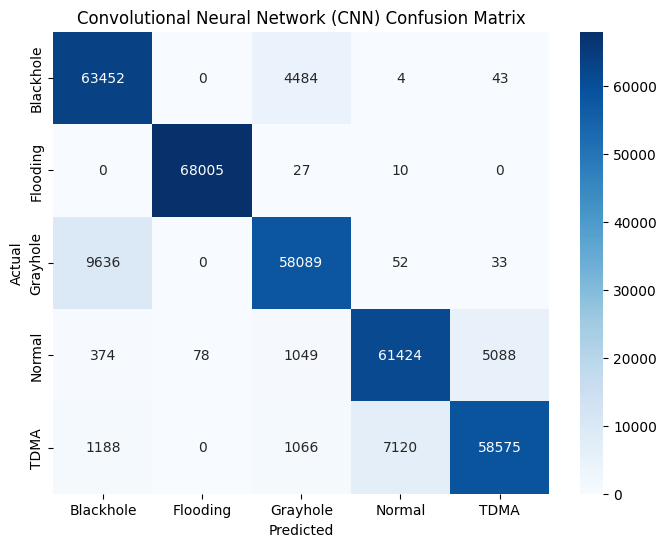

In [ ]:
# Make predictions on the test set
print("Making predictions with CNN...")
start_time_pred_cnn = time.time()
y_pred_cnn_probs = model_cnn.predict(X_test_cnn_reshaped)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1) # Get the predicted class index
end_time_pred_cnn = time.time()
prediction_time_cnn = end_time_pred_cnn - start_time_pred_cnn
print(f"CNN Prediction Time: {prediction_time_cnn:.4f} seconds")

# Evaluate the model's performance
accuracy_cnn = accuracy_score(y_test_encoded_cnn, y_pred_cnn)
print(f"\nCNN Accuracy on Test Set: {accuracy_cnn:.4f}")
print("\nCNN Classification Report:\n", classification_report(y_test_encoded_cnn, y_pred_cnn, target_names=label_encoder_cnn.classes_)) # Use target_names for readable report

# Visualize the confusion matrix
conf_matrix_cnn = confusion_matrix(y_test_encoded_cnn, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_cnn.classes_, yticklabels=label_encoder_cnn.classes_)
plt.title('Convolutional Neural Network (CNN) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Applying PCA for dimensionality reduction

In [ ]:
# Applying PCA for dimensionality reduction

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
import pandas as pd

# Assuming X_resampled and y_resampled are the ADASYN resampled data
# based on the 13 selected features from previous steps.

# Split the ADASYN resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled # Stratify to maintain class distribution
)

In [ ]:
# Standardize the features using StandardScaler
scaler_pca = StandardScaler()

# Fit the scaler on the resampled training data and transform both resampled train and test sets
X_train_scaled_pca = scaler_pca.fit_transform(X_train_resampled)
X_test_scaled_pca = scaler_pca.transform(X_test_resampled)

In [ ]:
# Initialize PCA - specify the number of components or the desired variance to retain
# to keep 95% of the variance:
pca = PCA(n_components=0.95, random_state=42)

# Fit PCA on the scaled resampled training data and transform both train and test sets
X_train_pca = pca.fit_transform(X_train_scaled_pca)
X_test_pca = pca.transform(X_test_scaled_pca)

print(f"Original number of features (after selection): {X_resampled.shape[1]}")
print(f"Number of features after PCA: {X_train_pca.shape[1]}")
print(f"Shape of training data after split, scaling, and PCA: {X_train_pca.shape}")
print(f"Shape of testing data after split, scaling, and PCA: {X_test_pca.shape}")

Original number of features (after selection): 13
Number of features after PCA: 9
Shape of training data after split, scaling, and PCA: (1189289, 9)
Shape of testing data after split, scaling, and PCA: (509696, 9)


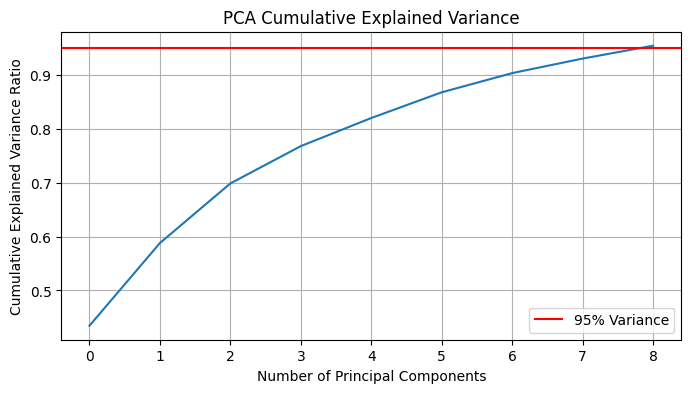

In [ ]:
# Visualize the explained variance by PCA components
plt.figure(figsize=(8, 4))

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.legend()
plt.show()

# Re-training Models with PCA
 Re-train Random Forest, XGBoost, Decision Trees, and LightGBM models using the PCA-transformed data and measure their prediction time on the test set

# Rerain ANN with PCA

In [ ]:
# Retrain ANN with PCA applied features

# Encode the target variable for ANN (ANNs typically require numerical labels)
# Use the label encoder that was fitted on the original resampled data
label_encoder_ann_pca = LabelEncoder()
y_train_encoded_ann_pca = label_encoder_ann_pca.fit_transform(y_train_resampled)
y_test_encoded_ann_pca = label_encoder_ann_pca.transform(y_test_resampled)

# Define the ANN model architecture
model_ann_pca = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)), # Input layer with PCA features
    Dense(64, activation='relu'), # Hidden layer
    Dense(len(np.unique(y_train_encoded_ann_pca)), activation='softmax') # Output layer (number of classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_ann_pca.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                      metrics=['accuracy'])

# Train the model
print("Training Artificial Neural Network (ANN) with PCA...")
start_time_ann_pca = time.time()
# We used 20% of the orginal training set for validation
history_ann_pca = model_ann_pca.fit(X_train_pca, y_train_encoded_ann_pca, epochs=10, batch_size=32, validation_split=0.2, verbose=1) # Added verbose=0 to reduce output
end_time_ann_pca = time.time()
training_time_ann_pca = end_time_ann_pca - start_time_ann_pca
print(f"ANN (PCA) Training Time: {training_time_ann_pca:.4f} seconds")

Training Artificial Neural Network (ANN) with PCA...
Epoch 1/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.8492 - loss: 0.3033 - val_accuracy: 0.8997 - val_loss: 0.2195
Epoch 2/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9000 - loss: 0.2151 - val_accuracy: 0.9199 - val_loss: 0.1783
Epoch 3/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.9169 - loss: 0.1853 - val_accuracy: 0.8965 - val_loss: 0.2102
Epoch 4/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9222 - loss: 0.1746 - val_accuracy: 0.9137 - val_loss: 0.1840
Epoch 5/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.9266 - loss: 0.1663 - val_accuracy: 0.9304 - val_loss: 0.1542
Epoch 6/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9298 - loss: 0.1608 - val_accuracy: 0.9342 - val_loss: 0.1526
Epoch 7/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9316 - loss: 0.1571 - val_accuracy: 0.9312 - val_loss: 0.1507
Epoch 8/10
29733

In [ ]:
# Make predictions on the test set
print("Making predictions with ANN (PCA)...")
start_time_pred_ann_pca = time.time()
y_pred_ann_pca_probs = model_ann_pca.predict(X_test_pca)
y_pred_ann_pca = np.argmax(y_pred_ann_pca_probs, axis=1) # Get the predicted class index
end_time_pred_ann_pca = time.time()
prediction_time_ann_pca = end_time_pred_ann_pca - start_time_pred_ann_pca
print(f"ANN (PCA) Prediction Time: {prediction_time_ann_pca:.4f} seconds")

Making predictions with ANN (PCA)...
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 12s 762us/step
ANN (PCA) Prediction Time: 16.2459 seconds



ANN (PCA) Accuracy on Test Set: 0.9365

ANN (PCA) Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.91      0.97      0.94    101975
    Flooding       1.00      1.00      1.00    102063
    Grayhole       0.96      0.90      0.93    101714
      Normal       0.90      0.91      0.91    102020
        TDMA       0.92      0.90      0.91    101924

    accuracy                           0.94    509696
   macro avg       0.94      0.94      0.94    509696
weighted avg       0.94      0.94      0.94    509696



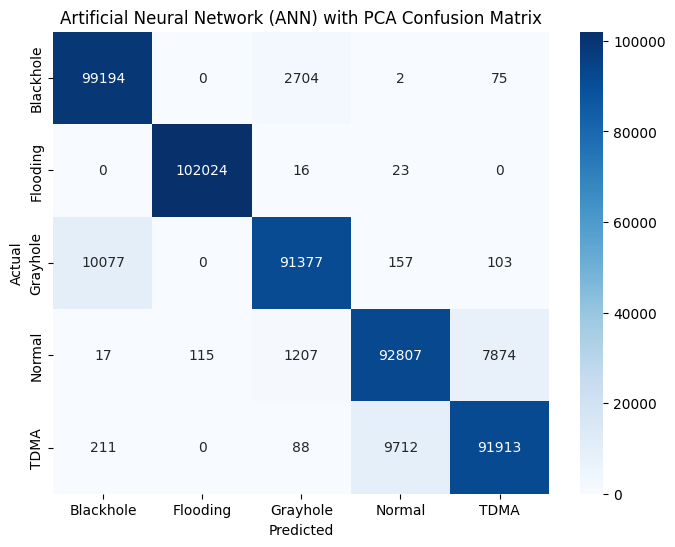

In [ ]:
# Evaluate the model's performance
accuracy_ann_pca = accuracy_score(y_test_encoded_ann_pca, y_pred_ann_pca)
print(f"\nANN (PCA) Accuracy on Test Set: {accuracy_ann_pca:.4f}")
print("\nANN (PCA) Classification Report:\n", classification_report(y_test_encoded_ann_pca, y_pred_ann_pca, target_names=label_encoder_ann_pca.classes_)) # Use target_names for readable report

# Visualize the confusion matrix
conf_matrix_ann_pca = confusion_matrix(y_test_encoded_ann_pca, y_pred_ann_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_ann_pca.classes_, yticklabels=label_encoder_ann_pca.classes_)
plt.title('Artificial Neural Network (ANN) with PCA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Rerain CNN with PCA

In [ ]:
# Retrain CNN with PCA applied features

# Encode the target variable for CNN (CNNs typically require numerical labels)
# Use the label encoder that was fitted on the original resampled data
label_encoder_cnn_pca = LabelEncoder()
y_train_encoded_cnn_pca = label_encoder_cnn_pca.fit_transform(y_train_resampled)
y_test_encoded_cnn_pca = label_encoder_cnn_pca.transform(y_test_resampled)

# Reshape the PCA-transformed data for CNN.
# CNN expects input in the format (samples, time steps, features).
# Here, we treat each PCA component as a time step of length 1.
X_train_pca_reshaped = X_train_pca.reshape((X_train_pca.shape[0], X_train_pca.shape[1], 1))
X_test_pca_reshaped = X_test_pca.reshape((X_test_pca.shape[0], X_test_pca.shape[1], 1))

print(f"Shape of training data after reshaping for CNN (PCA): {X_train_pca_reshaped.shape}")
print(f"Shape of testing data after reshaping for CNN (PCA): {X_test_pca_reshaped.shape}")

Shape of training data after reshaping for CNN (PCA): (1189289, 9, 1)
Shape of testing data after reshaping for CNN (PCA): (509696, 9, 1)


In [ ]:
# Define the CNN model architecture
model_cnn_pca = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_pca_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train_encoded_cnn_pca)), activation='softmax') # Output layer (number of classes)
])

# Compile the model
model_cnn_pca.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                      metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
print("Training Convolutional Neural Network (CNN) with PCA...")
start_time_cnn_pca = time.time()
# We used 20% of the orginal training set for validation
history_cnn_pca = model_cnn_pca.fit(X_train_pca_reshaped, y_train_encoded_cnn_pca, epochs=10, batch_size=32, validation_split=0.2, verbose=1) # Added verbose=0 to reduce output
end_time_cnn_pca = time.time()
training_time_cnn_pca = end_time_cnn_pca - start_time_cnn_pca
print(f"CNN (PCA) Training Time: {training_time_cnn_pca:.4f} seconds")

Training Convolutional Neural Network (CNN) with PCA...
Epoch 1/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.8379 - loss: 0.3307 - val_accuracy: 0.8628 - val_loss: 0.2633
Epoch 2/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.8669 - loss: 0.2591 - val_accuracy: 0.8983 - val_loss: 0.2260
Epoch 3/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.8958 - loss: 0.2233 - val_accuracy: 0.8976 - val_loss: 0.2166
Epoch 4/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9021 - loss: 0.2098 - val_accuracy: 0.8957 - val_loss: 0.2289
Epoch 5/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.8938 - loss: 0.2223 - val_accuracy: 0.9060 - val_loss: 0.1975
Epoch 6/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9086 - loss: 0.1991 - val_accuracy: 0.9108 - val_loss: 0.2005
Epoch 7/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.9068 - loss: 0.2026 - val_accuracy: 0.9158 - val_loss: 0.1850
Epoch 8/10
29

In [ ]:
# Make predictions on the test set
print("Making predictions with CNN (PCA)...")
start_time_pred_cnn_pca = time.time()
y_pred_cnn_pca_probs = model_cnn_pca.predict(X_test_pca_reshaped)
y_pred_cnn_pca = np.argmax(y_pred_cnn_pca_probs, axis=1) # Get the predicted class index
end_time_pred_cnn_pca = time.time()
prediction_time_cnn_pca = end_time_pred_cnn_pca - start_time_pred_cnn_pca
print(f"CNN (PCA) Prediction Time: {prediction_time_cnn_pca:.4f} seconds")

Making predictions with CNN (PCA)...
15928/15928 ━━━━━━━━━━━━━━━━━━━━ 13s 822us/step
CNN (PCA) Prediction Time: 20.5374 seconds



CNN (PCA) Accuracy on Test Set: 0.9217

CNN (PCA) Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.90      0.92      0.91    101975
    Flooding       1.00      1.00      1.00    102063
    Grayhole       0.90      0.90      0.90    101714
      Normal       0.88      0.92      0.90    102020
        TDMA       0.93      0.87      0.90    101924

    accuracy                           0.92    509696
   macro avg       0.92      0.92      0.92    509696
weighted avg       0.92      0.92      0.92    509696



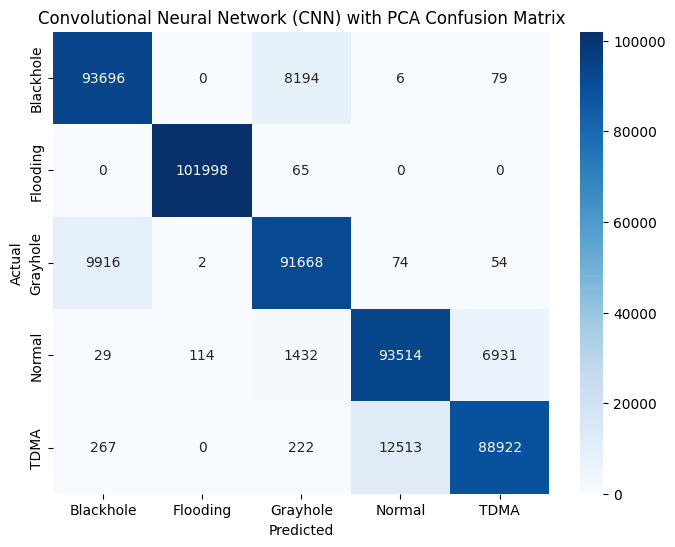

In [ ]:
# Evaluate the model's performance
accuracy_cnn_pca = accuracy_score(y_test_encoded_cnn_pca, y_pred_cnn_pca)
print(f"\nCNN (PCA) Accuracy on Test Set: {accuracy_cnn_pca:.4f}")
print("\nCNN (PCA) Classification Report:\n", classification_report(y_test_encoded_cnn_pca, y_pred_cnn_pca, target_names=label_encoder_cnn_pca.classes_)) # Use target_names for readable report

# Visualize the confusion matrix
conf_matrix_cnn_pca = confusion_matrix(y_test_encoded_cnn_pca, y_pred_cnn_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_cnn_pca.classes_, yticklabels=label_encoder_cnn_pca.classes_)
plt.title('Convolutional Neural Network (CNN) with PCA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Rerain XGBoost with PCA

In [ ]:
# Train XGBoost with PCA
print("\nTraining XGBoost with PCA...")
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the XGBoost model
xgb_model_pca = XGBClassifier(random_state=42)

# Encode the target variable if XGBoost requires numerical labels (generally it can handle strings, but for consistency)
label_encoder_xgb_pca = LabelEncoder()
y_train_encoded_xgb_pca = label_encoder_xgb_pca.fit_transform(y_train_resampled)
y_test_encoded_xgb_pca = label_encoder_xgb_pca.transform(y_test_resampled)

# Fit the model using the PCA-transformed training data and encoded training labels
xgb_model_pca.fit(X_train_pca, y_train_encoded_xgb_pca)


Training XGBoost with PCA...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
start_time_pred_xgb_pca = time.time()
# Make predictions on the PCA-transformed test data
y_pred_xgb_pca = xgb_model_pca.predict(X_test_pca)
end_time_pred_xgb_pca = time.time()
prediction_time_xgb_pca = end_time_pred_xgb_pca - start_time_pred_xgb_pca
print(f"XGBoost (PCA) Prediction Time: {prediction_time_xgb_pca:.4f} seconds")

XGBoost (PCA) Prediction Time: 4.0816 seconds



XGBoost (PCA) Accuracy on Test Set: 0.9477

XGBoost (PCA) Classification Report:
              precision    recall  f1-score   support

   Blackhole       0.94      0.96      0.95    101975
    Flooding       1.00      1.00      1.00    102063
    Grayhole       0.94      0.94      0.94    101714
      Normal       0.90      0.95      0.92    102020
        TDMA       0.96      0.89      0.92    101924

    accuracy                           0.95    509696
   macro avg       0.95      0.95      0.95    509696
weighted avg       0.95      0.95      0.95    509696



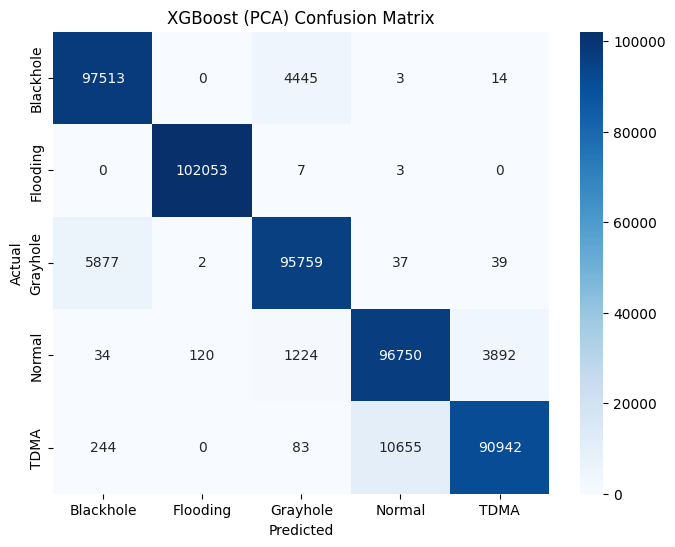

In [ ]:
# Evaluate the model's performance using the original test labels and predicted encoded labels
# Decode the predicted labels back to original class names for the classification report and confusion matrix
y_pred_xgb_pca_decoded = label_encoder_xgb_pca.inverse_transform(y_pred_xgb_pca)


accuracy_xgb_pca = accuracy_score(y_test_resampled, y_pred_xgb_pca_decoded)
print(f"\nXGBoost (PCA) Accuracy on Test Set: {accuracy_xgb_pca:.4f}")
print("\nXGBoost (PCA) Classification Report:")
# Use target_names for the classification report
print(classification_report(y_test_resampled, y_pred_xgb_pca_decoded))

conf_matrix_xgb_pca = confusion_matrix(y_test_resampled, y_pred_xgb_pca_decoded)
plt.figure(figsize=(8, 6))
# Use the class names from the label encoder for the confusion matrix labels
sns.heatmap(conf_matrix_xgb_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_xgb_pca.classes_, yticklabels=label_encoder_xgb_pca.classes_)
plt.title('XGBoost (PCA) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree with PCA

In [ ]:
# Train Decision Tree with PCA
print("\nTraining Decision Tree with PCA...")
dt_model_pca = DecisionTreeClassifier(random_state=42)

dt_model_pca.fit(X_train_pca, y_train_resampled) # Use the correctly resampled training labels


Training Decision Tree with PCA...


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the PCA-transformed test data
start_time_pred_dt_pca = time.time()
y_pred_dt_pca = dt_model_pca.predict(X_test_pca)
end_time_pred_dt_pca = time.time()
prediction_time_dt_pca = end_time_pred_dt_pca - start_time_pred_dt_pca
print(f"Decision Tree (PCA) Prediction Time: {prediction_time_dt_pca:.4f} seconds")

Decision Tree (PCA) Prediction Time: 0.0896 seconds



Decision Tree (PCA) Accuracy on Test Set: 0.9785

Decision Tree (PCA) Classification Report:
              precision    recall  f1-score   support

   Blackhole       0.98      0.98      0.98    101975
    Flooding       1.00      1.00      1.00    102063
    Grayhole       0.97      0.98      0.98    101714
      Normal       0.97      0.96      0.96    102020
        TDMA       0.96      0.98      0.97    101924

    accuracy                           0.98    509696
   macro avg       0.98      0.98      0.98    509696
weighted avg       0.98      0.98      0.98    509696



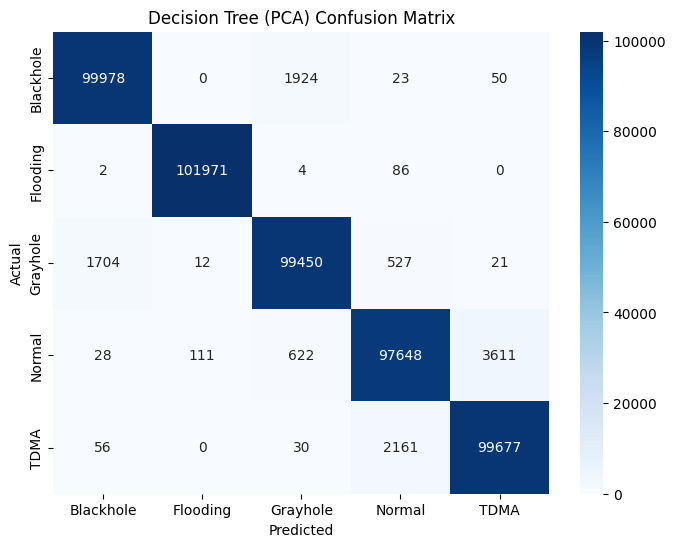

In [ ]:
# Decision Tree classifier does not have a .classes_ attribute before fitting in some versions.
# We can get the classes from the trained model or the original labels
# Use the classes from the training labels for consistency
dt_classes_pca = sorted(y_train_resampled.unique())


accuracy_dt_pca = accuracy_score(y_test_resampled, y_pred_dt_pca) # Use y_test_resampled for evaluation
print(f"\nDecision Tree (PCA) Accuracy on Test Set: {accuracy_dt_pca:.4f}")
print("\nDecision Tree (PCA) Classification Report:")
print(classification_report(y_test_resampled, y_pred_dt_pca)) # Use y_test_resampled for evaluation

conf_matrix_dt_pca = confusion_matrix(y_test_resampled, y_pred_dt_pca) # Use y_test_resampled for evaluation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_classes_pca, yticklabels=dt_classes_pca)
plt.title('Decision Tree (PCA) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Applying LDA for dimensionality reduction

In [ ]:
# Applying LDA for dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA - specify the number of components (cannot exceed n_classes - 1)
# Get the number of unique classes in y_train
n_classes = len(np.unique(y_train))
lda = LinearDiscriminantAnalysis(n_components=min(n_classes - 1, X_train_scaled.shape[1]))

# Fit LDA on the scaled training data and transform both train and test sets
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Number of features after LDA: {X_train_lda.shape[1]}")

Original number of features: 13
Number of features after LDA: 4


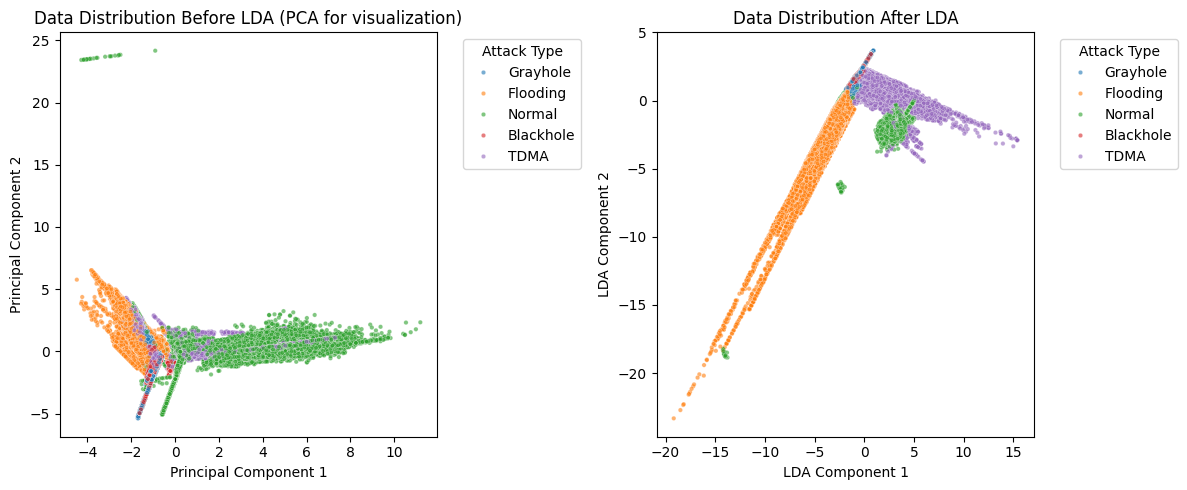

In [ ]:
# Visualize data before and after LDA

# Before LDA (using PCA for visualization of high-dimensional data)
# We'll use PCA to reduce the original scaled data to 2 components for visualization
pca_for_viz = PCA(n_components=2, random_state=42)
X_scaled_pca_viz = pca_for_viz.fit_transform(X_train_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled_pca_viz[:, 0], y=X_scaled_pca_viz[:, 1], hue=y_train, palette='tab10', s=10, alpha=0.6)
plt.title('Data Distribution Before LDA (PCA for visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# After LDA
# LDA already reduced the data, so we can use the first two components directly
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue=y_train, palette='tab10', s=10, alpha=0.6)
plt.title('Data Distribution After LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Train ANN, CNN, XGB and LR Models with LDA

#Retrain ANN with LDA

Training Artificial Neural Network (ANN) with LDA...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29733/29733 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.8383 - loss: 0.3469 - val_accuracy: 0.8995 - val_loss: 0.2417
Epoch 2/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.8985 - loss: 0.2432 - val_accuracy: 0.9082 - val_loss: 0.2250
Epoch 3/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9063 - loss: 0.2251 - val_accuracy: 0.9065 - val_loss: 0.2132
Epoch 4/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9103 - loss: 0.2155 - val_accuracy: 0.8938 - val_loss: 0.2524
Epoch 5/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9122 - loss: 0.2098 - val_accuracy: 0.9158 - val_loss: 0.2105
Epoch 6/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9131 - loss: 0.2061 - val_accuracy: 0.9202 - val_loss: 0.1943
Epoch 7/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9151 - loss: 0.2011 - val_accuracy: 0.9216 - val_loss: 0.1891
Epoch 8/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9167 - lo

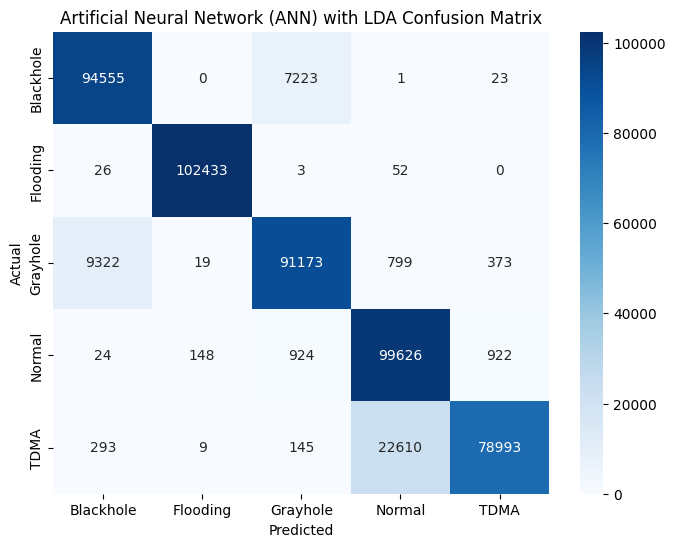

In [ ]:
# Retrain ANN with LDA applied features

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the target variable for ANN (ANNs typically require numerical labels)
# Use the label encoder that was fitted on the original resampled data
label_encoder_ann_lda = LabelEncoder()
y_train_encoded_ann_lda = label_encoder_ann_lda.fit_transform(y_train) # Use y_train from before LDA
y_test_encoded_ann_lda = label_encoder_ann_lda.transform(y_test)   # Use y_test from before LDA

# Define the ANN model architecture
model_ann_lda = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_lda.shape[1],)), # Input layer with LDA features
    Dense(64, activation='relu'), # Hidden layer
    Dense(len(np.unique(y_train_encoded_ann_lda)), activation='softmax') # Output layer (number of classes)
])

# Compile the model
model_ann_lda.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                      metrics=['accuracy'])

# Train the model
print("Training Artificial Neural Network (ANN) with LDA...")
start_time_ann_lda = time.time()
history_ann_lda = model_ann_lda.fit(X_train_lda, y_train_encoded_ann_lda, epochs=10, batch_size=32, validation_split=0.2, verbose=1) # Added verbose=0 to reduce output
end_time_ann_lda = time.time()
training_time_ann_lda = end_time_ann_lda - start_time_ann_lda
print(f"ANN (LDA) Training Time: {training_time_ann_lda:.4f} seconds")

# Make predictions on the test set
print("Making predictions with ANN (LDA)...")
start_time_pred_ann_lda = time.time()
y_pred_ann_lda_probs = model_ann_lda.predict(X_test_lda)
y_pred_ann_lda = np.argmax(y_pred_ann_lda_probs, axis=1) # Get the predicted class index
end_time_pred_ann_lda = time.time()
prediction_time_ann_lda = end_time_pred_ann_lda - start_time_pred_ann_lda
print(f"ANN (LDA) Prediction Time: {prediction_time_ann_lda:.4f} seconds")

# Evaluate the model's performance
accuracy_ann_lda = accuracy_score(y_test_encoded_ann_lda, y_pred_ann_lda)
print(f"\nANN (LDA) Accuracy on Test Set: {accuracy_ann_lda:.4f}")
print("\nANN (LDA) Classification Report:\n", classification_report(y_test_encoded_ann_lda, y_pred_ann_lda, target_names=label_encoder_ann_lda.classes_)) # Use target_names for readable report

# Visualize the confusion matrix
conf_matrix_ann_lda = confusion_matrix(y_test_encoded_ann_lda, y_pred_ann_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann_lda, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_ann_lda.classes_, yticklabels=label_encoder_ann_lda.classes_)
plt.title('Artificial Neural Network (ANN) with LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Retrain CNN with LDA

Shape of training data after reshaping for CNN (LDA): (1189289, 4, 1)
Shape of testing data after reshaping for CNN (LDA): (509696, 4, 1)
Training Convolutional Neural Network (CNN) with LDA...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29733/29733 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.8342 - loss: 0.3537 - val_accuracy: 0.8865 - val_loss: 0.2594
Epoch 2/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.8925 - loss: 0.2545 - val_accuracy: 0.9029 - val_loss: 0.2557
Epoch 3/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.8978 - loss: 0.2443 - val_accuracy: 0.9010 - val_loss: 0.2291
Epoch 4/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.8947 - loss: 0.2403 - val_accuracy: 0.9038 - val_loss: 0.2257
Epoch 5/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9032 - loss: 0.2262 - val_accuracy: 0.9080 - val_loss: 0.2170
Epoch 6/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9058 - loss: 0.2200 - val_accuracy: 0.9120 - val_loss: 0.2103
Epoch 7/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9064 - loss: 0.2174 - val_accuracy: 0.9028 - val_loss: 0.2249
Epoch 8/10
29733/29733 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9076 - lo

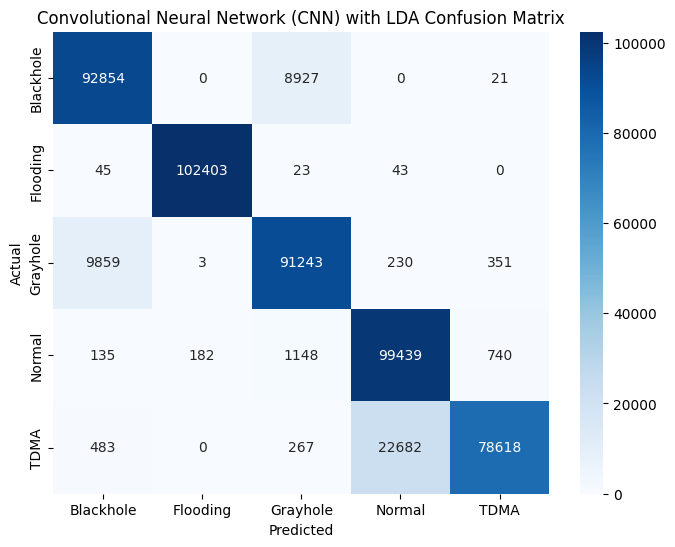

In [ ]:
# Retrain CNN with LDA applied features

# Encode the target variable for CNN (CNNs typically require numerical labels)
# Use the label encoder that was fitted on the original resampled data
label_encoder_cnn_lda = LabelEncoder()
y_train_encoded_cnn_lda = label_encoder_cnn_lda.fit_transform(y_train) # Use y_train from before LDA
y_test_encoded_cnn_lda = label_encoder_cnn_lda.transform(y_test)   # Use y_test from before LDA

# Reshape the LDA-transformed data for CNN.
# CNN expects input in the format (samples, time steps, features).
# Here, we treat each LDA component as a time step of length 1.
X_train_lda_reshaped = X_train_lda.reshape((X_train_lda.shape[0], X_train_lda.shape[1], 1))
X_test_lda_reshaped = X_test_lda.reshape((X_test_lda.shape[0], X_test_lda.shape[1], 1))

print(f"Shape of training data after reshaping for CNN (LDA): {X_train_lda_reshaped.shape}")
print(f"Shape of testing data after reshaping for CNN (LDA): {X_test_lda_reshaped.shape}")

# Define the CNN model architecture
model_cnn_lda = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_lda_reshaped.shape[1], 1)), # Adjust kernel size if needed
    MaxPooling1D(pool_size=1), # Adjust pool size if needed
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train_encoded_cnn_lda)), activation='softmax') # Output layer (number of classes)
])

# Compile the model
model_cnn_lda.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                      metrics=['accuracy'])

# Train the model
print("Training Convolutional Neural Network (CNN) with LDA...")
start_time_cnn_lda = time.time()
history_cnn_lda = model_cnn_lda.fit(X_train_lda_reshaped, y_train_encoded_cnn_lda, epochs=10, batch_size=32, validation_split=0.2, verbose=1) # Added verbose=0 to reduce output
end_time_cnn_lda = time.time()
training_time_cnn_lda = end_time_cnn_lda - start_time_cnn_lda
print(f"CNN (LDA) Training Time: {training_time_cnn_lda:.4f} seconds")

# Make predictions on the test set
print("Making predictions with CNN (LDA)...")
start_time_pred_cnn_lda = time.time()
y_pred_cnn_lda_probs = model_cnn_lda.predict(X_test_lda_reshaped)
y_pred_cnn_lda = np.argmax(y_pred_cnn_lda_probs, axis=1) # Get the predicted class index
end_time_pred_cnn_lda = time.time()
prediction_time_cnn_lda = end_time_pred_cnn_lda - start_time_pred_cnn_lda
print(f"CNN (LDA) Prediction Time: {prediction_time_cnn_lda:.4f} seconds")

# Evaluate the model's performance
accuracy_cnn_lda = accuracy_score(y_test_encoded_cnn_lda, y_pred_cnn_lda)
print(f"\nCNN (LDA) Accuracy on Test Set: {accuracy_cnn_lda:.4f}")
print("\nCNN (LDA) Classification Report:\n", classification_report(y_test_encoded_cnn_lda, y_pred_cnn_lda, target_names=label_encoder_cnn_lda.classes_)) # Use target_names for readable report

# Visualize the confusion matrix
conf_matrix_cnn_lda = confusion_matrix(y_test_encoded_cnn_lda, y_pred_cnn_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_lda, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_cnn_lda.classes_, yticklabels=label_encoder_cnn_lda.classes_)
plt.title('Convolutional Neural Network (CNN) with LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Retrain  XGBoost with LDA


Training XGBoost with LDA...
XGBoost (LDA) Training Time: 31.0679 seconds
XGBoost (LDA) Prediction Time: 3.6257 seconds

XGBoost (LDA) Accuracy on Test Set: 0.9281

XGBoost (LDA) Classification Report:
              precision    recall  f1-score   support

   Blackhole       0.92      0.94      0.93    101802
    Flooding       1.00      1.00      1.00    102514
    Grayhole       0.93      0.93      0.93    101686
      Normal       0.84      0.96      0.90    101644
        TDMA       0.97      0.81      0.88    102050

    accuracy                           0.93    509696
   macro avg       0.93      0.93      0.93    509696
weighted avg       0.93      0.93      0.93    509696



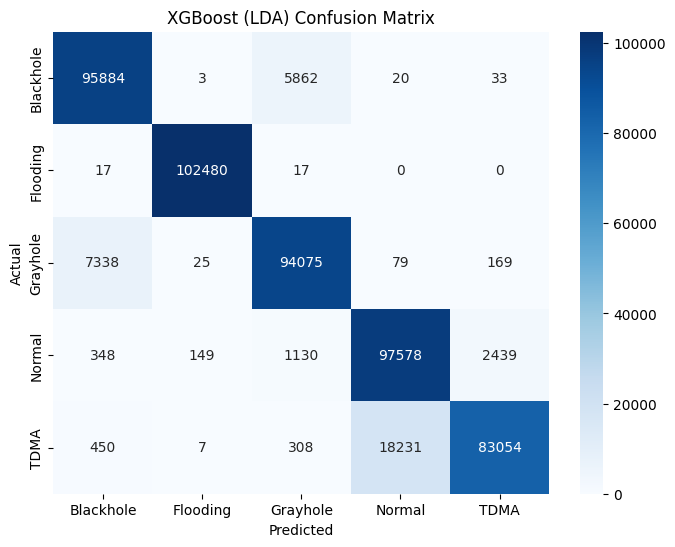

In [ ]:
# Retrain XGBoost with LDA
print("\nTraining XGBoost with LDA...")
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the XGBoost model
xgb_model_lda = XGBClassifier(random_state=42)

# Encode the target variable if XGBoost requires numerical labels (generally it can handle strings, but for consistency)
label_encoder_xgb_lda = LabelEncoder()
y_train_encoded_xgb_lda = label_encoder_xgb_lda.fit_transform(y_train) # Use y_train from before LDA
y_test_encoded_xgb_lda = label_encoder_xgb_lda.transform(y_test)   # Use y_test from before LDA

start_time_xgb_lda = time.time()
# Fit the model using the LDA-transformed training data and encoded training labels
xgb_model_lda.fit(X_train_lda, y_train_encoded_xgb_lda)
end_time_xgb_lda = time.time()
training_time_xgb_lda = end_time_xgb_lda - start_time_xgb_lda
print(f"XGBoost (LDA) Training Time: {training_time_xgb_lda:.4f} seconds")

start_time_pred_xgb_lda = time.time()
# Make predictions on the LDA-transformed test data
y_pred_xgb_lda = xgb_model_lda.predict(X_test_lda)
end_time_pred_xgb_lda = time.time()
prediction_time_xgb_lda = end_time_pred_xgb_lda - start_time_pred_xgb_lda
print(f"XGBoost (LDA) Prediction Time: {prediction_time_xgb_lda:.4f} seconds")

# Evaluate the model's performance using the original test labels and predicted encoded labels
# Decode the predicted labels back to original class names for the classification report and confusion matrix
y_pred_xgb_lda_decoded = label_encoder_xgb_lda.inverse_transform(y_pred_xgb_lda)


accuracy_xgb_lda = accuracy_score(y_test, y_pred_xgb_lda_decoded) # Use y_test for evaluation
print(f"\nXGBoost (LDA) Accuracy on Test Set: {accuracy_xgb_lda:.4f}")
print("\nXGBoost (LDA) Classification Report:")
# Use target_names for the classification report
print(classification_report(y_test, y_pred_xgb_lda_decoded))

conf_matrix_xgb_lda = confusion_matrix(y_test, y_pred_xgb_lda_decoded)
plt.figure(figsize=(8, 6))
# Use the class names from the label encoder for the confusion matrix labels
sns.heatmap(conf_matrix_xgb_lda, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_xgb_lda.classes_, yticklabels=label_encoder_xgb_lda.classes_)
plt.title('XGBoost (LDA) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Retrain DT with LDA


Training Decision Tree with LDA...
Decision Tree (LDA) Training Time: 28.3964 seconds
Decision Tree (LDA) Prediction Time: 0.1010 seconds

Decision Tree (LDA) Accuracy on Test Set: 0.9664

Decision Tree (LDA) Classification Report:
              precision    recall  f1-score   support

   Blackhole       0.97      0.97      0.97    101802
    Flooding       1.00      1.00      1.00    102514
    Grayhole       0.96      0.96      0.96    101686
      Normal       0.96      0.94      0.95    101644
        TDMA       0.95      0.96      0.96    102050

    accuracy                           0.97    509696
   macro avg       0.97      0.97      0.97    509696
weighted avg       0.97      0.97      0.97    509696



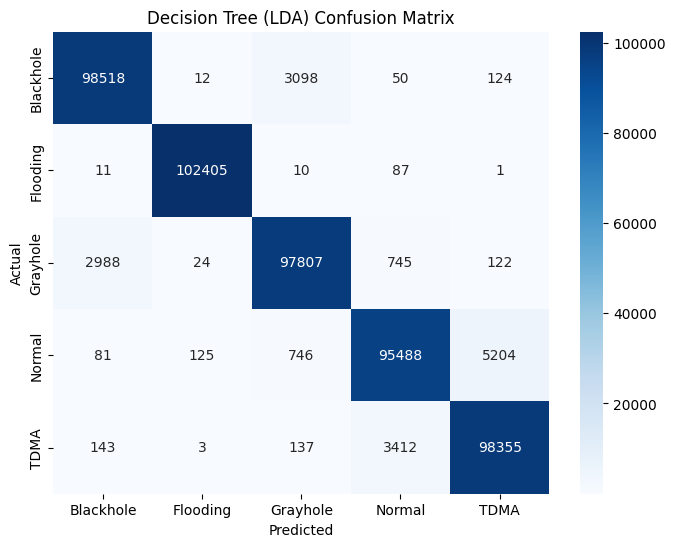

In [ ]:
# Retrain Decision Tree with LDA
print("\nTraining Decision Tree with LDA...")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Decision Tree model
dt_model_lda = DecisionTreeClassifier(random_state=42)

start_time_dt_lda = time.time()
# Fit the model using the LDA-transformed training data and training labels
dt_model_lda.fit(X_train_lda, y_train) # Use y_train from before LDA
end_time_dt_lda = time.time()
training_time_dt_lda = end_time_dt_lda - start_time_dt_lda
print(f"Decision Tree (LDA) Training Time: {training_time_dt_lda:.4f} seconds")

start_time_pred_dt_lda = time.time()
# Make predictions on the LDA-transformed test data
y_pred_dt_lda = dt_model_lda.predict(X_test_lda)
end_time_pred_dt_lda = time.time()
prediction_time_dt_lda = end_time_pred_dt_lda - start_time_pred_dt_lda
print(f"Decision Tree (LDA) Prediction Time: {prediction_time_dt_lda:.4f} seconds")

# Decision Tree classifier does not have a .classes_ attribute before fitting in some versions.
# We can get the classes from the trained model or the original labels
# Use the classes from the training labels for consistency
dt_classes_lda = sorted(y_train.unique()) # Use y_train from before LDA


accuracy_dt_lda = accuracy_score(y_test, y_pred_dt_lda) # Use y_test for evaluation
print(f"\nDecision Tree (LDA) Accuracy on Test Set: {accuracy_dt_lda:.4f}")
print("\nDecision Tree (LDA) Classification Report:")
print(classification_report(y_test, y_pred_dt_lda)) # Use y_test for evaluation

conf_matrix_dt_lda = confusion_matrix(y_test, y_pred_dt_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_lda, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_classes_lda, yticklabels=dt_classes_lda)
plt.title('Decision Tree (LDA) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a dictionary to store the results

In [ ]:
# Create a dictionary to store the results
results = {
    'Model': [],
    'Accuracy': [],
    'Prediction Time (s)': [],
    'Feature Engineering': []
}

# Add results for models trained without dimensionality reduction (using scaled data)
if 'accuracy_score' in globals() and 'y_test_encoded_xgb' in globals() and 'y_pred_xgb' in globals():
    results['Model'].append('XGBoost')
    results['Accuracy'].append(accuracy_score(y_test_encoded_xgb, y_pred_xgb))
    results['Prediction Time (s)'].append(prediction_time_xgb)
    results['Feature Engineering'].append('None')

if 'accuracy_dt' in globals():
    results['Model'].append('Decision Tree')
    results['Accuracy'].append(accuracy_dt)
    results['Prediction Time (s)'].append(prediction_time_dt)
    results['Feature Engineering'].append('None')

if 'accuracy_ann' in globals():
    results['Model'].append('ANN')
    results['Accuracy'].append(accuracy_ann)
    results['Prediction Time (s)'].append(prediction_time_ann)
    results['Feature Engineering'].append('None')

if 'accuracy_cnn' in globals():
    results['Model'].append('CNN')
    results['Accuracy'].append(accuracy_cnn)
    results['Prediction Time (s)'].append(prediction_time_cnn)
    results['Feature Engineering'].append('None')


# Add results for models trained with PCA
if 'accuracy_ann_pca' in globals():
    results['Model'].append('ANN (PCA)')
    results['Accuracy'].append(accuracy_ann_pca)
    results['Prediction Time (s)'].append(prediction_time_ann_pca)
    results['Feature Engineering'].append('PCA')

if 'accuracy_cnn_pca' in globals():
    results['Model'].append('CNN (PCA)')
    results['Accuracy'].append(accuracy_cnn_pca)
    results['Prediction Time (s)'].append(prediction_time_cnn_pca)
    results['Feature Engineering'].append('PCA')

if 'accuracy_lr_pca' in globals():
    results['Model'].append('Logistic Regression (PCA)')
    results['Accuracy'].append(accuracy_lr_pca)
    results['Prediction Time (s)'].append(prediction_time_lr_pca)
    results['Feature Engineering'].append('PCA')

if 'accuracy_xgb_pca' in globals():
    results['Model'].append('XGBoost (PCA)')
    results['Accuracy'].append(accuracy_xgb_pca)
    results['Prediction Time (s)'].append(prediction_time_xgb_pca)
    results['Feature Engineering'].append('PCA')

if 'accuracy_dt_pca' in globals():
    results['Model'].append('Decision Tree (PCA)')
    results['Accuracy'].append(accuracy_dt_pca)
    results['Prediction Time (s)'].append(prediction_time_dt_pca)
    results['Feature Engineering'].append('PCA')


# Add results for models trained with LDA
if 'accuracy_ann_lda' in globals():
    results['Model'].append('ANN (LDA)')
    results['Accuracy'].append(accuracy_ann_lda)
    results['Prediction Time (s)'].append(prediction_time_ann_lda)
    results['Feature Engineering'].append('LDA')

if 'accuracy_cnn_lda' in globals():
    results['Model'].append('CNN (LDA)')
    results['Accuracy'].append(accuracy_cnn_lda)
    results['Prediction Time (s)'].append(prediction_time_cnn_lda)
    results['Feature Engineering'].append('LDA')

if 'accuracy_xgb_lda' in globals():
    results['Model'].append('XGBoost (LDA)')
    results['Accuracy'].append(accuracy_xgb_lda)
    results['Prediction Time (s)'].append(prediction_time_xgb_lda)
    results['Feature Engineering'].append('LDA')

if 'accuracy_dt_lda' in globals():
    results['Model'].append('Decision Tree (LDA)')
    results['Accuracy'].append(accuracy_dt_lda)
    results['Prediction Time (s)'].append(prediction_time_dt_lda)
    results['Feature Engineering'].append('LDA')


# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Display the categorized results
print("Model Performance Comparison (Categorized by Feature Engineering):")
display(results_df)

Model Performance Comparison (Categorized by Feature Engineering):


,Model,Accuracy,Prediction Time (s),Feature Engineering
0,XGBoost,0.981471,3.415807,None
1,Decision Tree,0.991766,0.094809,None
2,ANN,0.936227,18.529168,None
3,CNN,0.910970,20.532613,None
4,ANN (PCA),0.936470,16.245938,PCA
5,CNN (PCA),0.921722,20.537396,PCA
6,XGBoost (PCA),0.947657,4.081607,PCA
7,Decision Tree (PCA),0.978473,0.089592,PCA
8,ANN (LDA),0.915801,16.775432,LDA
9,CNN (LDA),0.911439,20.534322,LDA


# Visualize the comparison of model accuracy

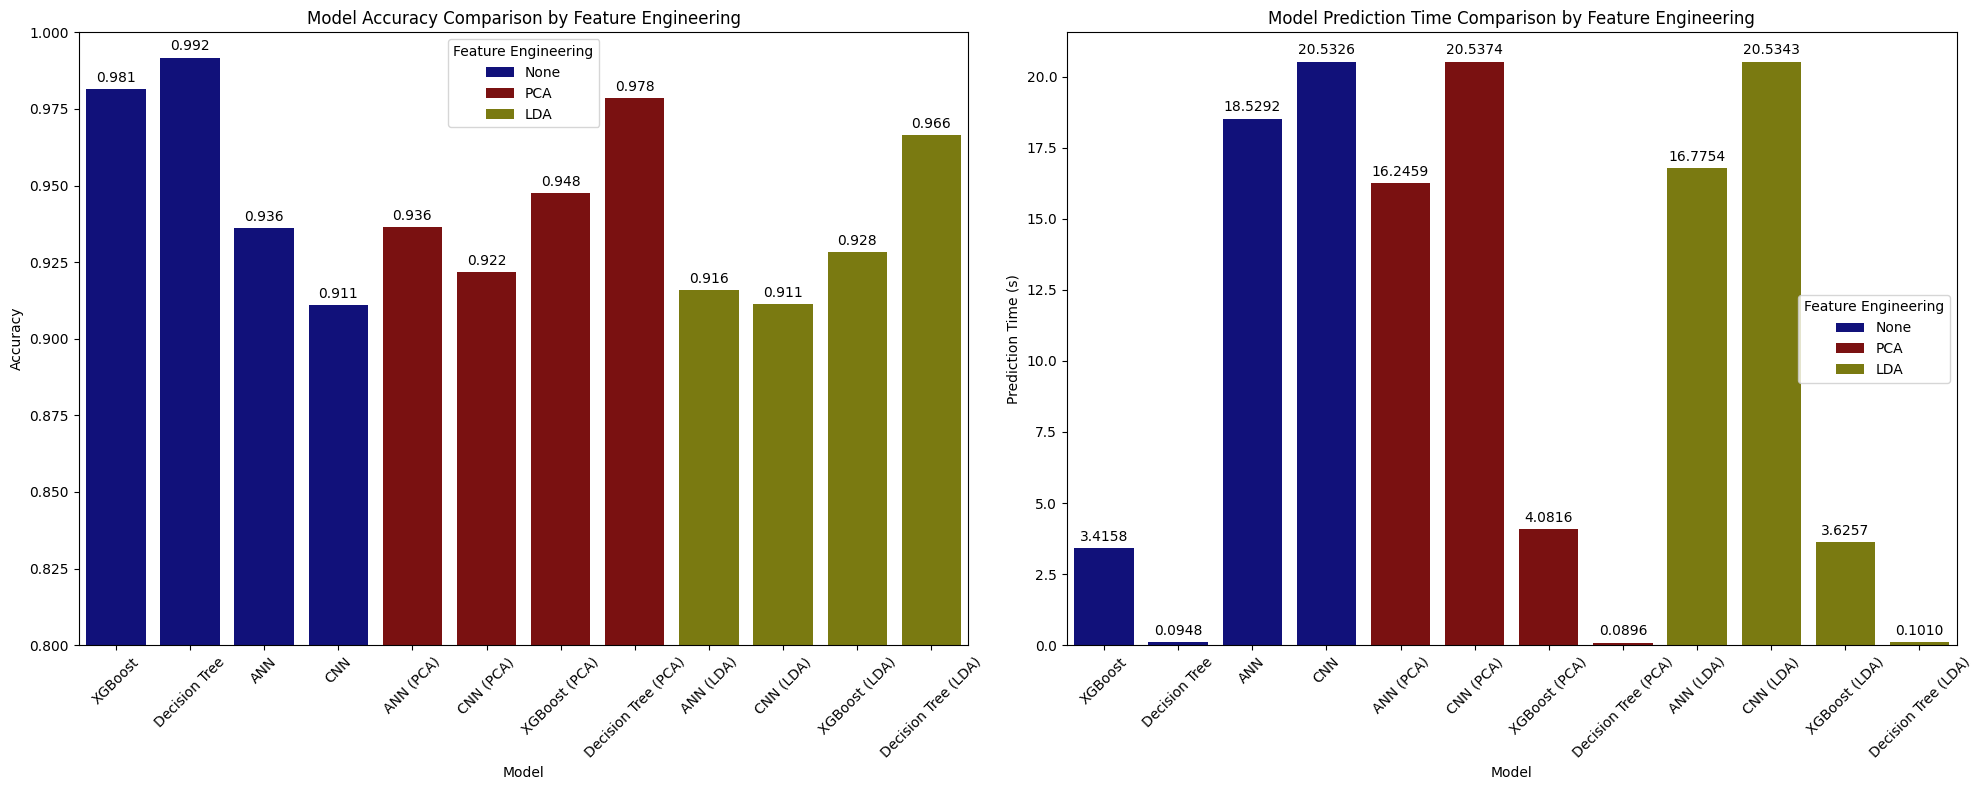

In [ ]:
# Visualize the comparison of model accuracy and prediction time

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Increased figure size

# Define a custom color palette with dark blue, dark red, and dark yellow
# Using hex codes for specific dark shades
custom_palette = ["#00008B", "#8B0000", "#8B8B00"] # Dark Blue, Dark Red, Dark Yellow

# Plot Accuracy
sns.barplot(ax=axes[0], x='Model', y='Accuracy', hue='Feature Engineering', data=results_df, palette=custom_palette)
axes[0].set_title('Model Accuracy Comparison by Feature Engineering')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45) # Removed ha='right'
axes[0].set_ylim(0.8, 1.0) # Set y-axis limit for better visualization of differences
axes[0].legend(title='Feature Engineering')

# Add accuracy values on top of the bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f', label_type='edge', padding=3)


# Plot Prediction Time
sns.barplot(ax=axes[1], x='Model', y='Prediction Time (s)', hue='Feature Engineering', data=results_df, palette=custom_palette)
axes[1].set_title('Model Prediction Time Comparison by Feature Engineering')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Prediction Time (s)')
axes[1].tick_params(axis='x', rotation=45) # Removed ha='right'
axes[1].legend(title='Feature Engineering')

# Add prediction time values on top of the bars
for container in axes[1].containers:
     axes[1].bar_label(container, fmt='%.4f', label_type='edge', padding=3)


plt.tight_layout()
plt.show()

In [ ]:
# Save the trained models
import joblib

# Specify the directory to save the models
save_dir = '/content/drive/MyDrive/WSN_DS/trained_models'
os.makedirs(save_dir, exist_ok=True) # Create the directory if it doesn't exist

# Save models trained without dimensionality reduction
if 'xgb' in globals():
    joblib.dump(xgb, os.path.join(save_dir, 'xgboost_model.joblib'))
    print("XGBoost model saved.")

if 'dt_model' in globals():
    joblib.dump(dt_model, os.path.join(save_dir, 'decision_tree_model.joblib'))
    print("Decision Tree model saved.")

if 'model' in globals():
    model.save(os.path.join(save_dir, 'ann_model.h5')) # Save Keras ANN model
    print("ANN model saved.")

if 'model_cnn' in globals():
    model_cnn.save(os.path.join(save_dir, 'cnn_model.h5')) # Save Keras CNN model
    print("CNN model saved.")


# Save models trained with PCA
if 'xgb_model_pca' in globals():
    joblib.dump(xgb_model_pca, os.path.join(save_dir, 'xgboost_pca_model.joblib'))
    print("XGBoost (PCA) model saved.")

if 'dt_model_pca' in globals():
    joblib.dump(dt_model_pca, os.path.join(save_dir, 'decision_tree_pca_model.joblib'))
    print("Decision Tree (PCA) model saved.")

if 'model_ann_pca' in globals():
    model_ann_pca.save(os.path.join(save_dir, 'ann_pca_model.h5')) # Save Keras ANN model
    print("ANN (PCA) model saved.")

if 'model_cnn_pca' in globals():
    model_cnn_pca.save(os.path.join(save_dir, 'cnn_pca_model.h5')) # Save Keras CNN model
    print("CNN (PCA) model saved.")


# Save models trained with LDA
if 'xgb_model_lda' in globals():
    joblib.dump(xgb_model_lda, os.path.join(save_dir, 'xgboost_lda_model.joblib'))
    print("XGBoost (LDA) model saved.")

if 'dt_model_lda' in globals():
    joblib.dump(dt_model_lda, os.path.join(save_dir, 'decision_tree_lda_model.joblib'))
    print("Decision Tree (LDA) model saved.")

if 'model_ann_lda' in globals():
    model_ann_lda.save(os.path.join(save_dir, 'ann_lda_model.h5')) # Save Keras ANN model
    print("ANN (LDA) model saved.")

if 'model_cnn_lda' in globals():
    model_cnn_lda.save(os.path.join(save_dir, 'cnn_lda_model.h5')) # Save Keras CNN model
    print("CNN (LDA) model saved.")


# Save the test set as a CSV file
# Assuming y_test is the original test set labels before any encoding
if 'x_test' in globals() and 'y_test' in globals():
    # Create a DataFrame for the test set (features and original labels)
    test_df = pd.DataFrame(x_test, columns=X.columns) # Use X.columns to get original feature names
    test_df['Attack type'] = y_test

    test_set_path = os.path.join(save_dir, 'test_set.csv')
    test_df.to_csv(test_set_path, index=False)
    print(f"\nTest set saved to: {test_set_path}")

XGBoost model saved.
Decision Tree model saved.
ANN model saved.
CNN model saved.


XGBoost (PCA) model saved.
Decision Tree (PCA) model saved.
ANN (PCA) model saved.
CNN (PCA) model saved.
XGBoost (LDA) model saved.
Decision Tree (LDA) model saved.
ANN (LDA) model saved.
CNN (LDA) model saved.

Test set saved to: /content/drive/MyDrive/WSN_DS/trained_models/test_set.csv
